Importing libraries...

--- [ STAGE 1: DATA LOADING & PREPARATION ] ---
Using 'bulletproof' CSV loading method...
File header found: ['uuid', 'timestamp', 'batteryLevel', 'batteryStatus', 'timeZone', 'mobileCountryCode', 'apps']


Reading file line by line: 0it [00:00, ?it/s]


Successfully read 20676 rows from CSV.
Raw data loaded into DataFrame. Shape: (20676, 7)


,uuid,timestamp,batteryLevel,batteryStatus,timeZone,mobileCountryCode,apps
0,0c39e5e59ee920da264c7fea78f0b658397998c235debe...,1511674053,16,discharging,America/Toronto,unknown,"[{'processName': 'com.samsung.vmmhux', 'priori..."
1,746d4ca274e805d1b5fe9cdbd38134ca8753fddee0f145...,1512431957,55,discharging,America/New_York,unknown,"[{'processName': 'com.ipsec.service', 'priorit..."
2,eb20b8b2103f98d5f3418dfe461502a0fa3d8242946070...,1511215731,45,charging,Europe/Helsinki,fi,[{'processName': 'com.sec.android.provider.bad...
3,0c39e5e59ee920da264c7fea78f0b658397998c235debe...,1511587254,87,discharging,America/Toronto,unknown,"[{'processName': 'com.samsung.vmmhux', 'priori..."
4,008d0c90d77658bb002951593118ab668c1141b6072e0c...,1513075633,74,discharging,Europe/Helsinki,fi,"[{'processName': 'com.policydm', 'priority': '..."



Parsing the complex 'apps' string...


Processing...:   0%|          | 0/20676 [00:00<?, ?it/s]

Exploding data... (each app gets its own row)
Data 'exploded'. New shape: (1207777, 8)
Normalizing app data (splitting dictionaries to columns)...
Engineering new features...


Processing...:   0%|          | 0/1207777 [00:00<?, ?it/s]

Processing...:   0%|          | 0/1207777 [00:00<?, ?it/s]


--- [ STAGE 2: PRE-ANALYSIS FILTERING ] ---
Data shape before filtering: (1207777, 13)
Data shape after filtering manufacturers: (311822, 13)
Identifying real user apps (apps that run in the foreground)...

Top 20 user-installed apps identified for analysis:
['apps', 'gms', 'googlequicksearchbox', 'music', 'providers', 'gm', 'app', 'gapps', 'scloud', 'SMT', 'youtube', 'talk', 'calendar', 'groupcast', 'klmsagent', 'email', 'inputmethod', 'tts', 'contacts', 'aasaservice']
Data shape after filtering for Top 20 apps: (193499, 13)

--- DATA PREPARATION & FILTERING COMPLETE ---

Clean data preview:


,uuid,timestamp,batteryLevel,batteryStatus,timeZone,mobileCountryCode,processName,priority,datetime,hour_of_day,day_of_week,deviceManufacturer,simpleAppName
25,0c39e5e59ee920da264c7fea78f0b658397998c235debe...,1511674053,16,discharging,America/Toronto,unknown,com.samsung.android.providers.context,Background process,2017-11-26 05:27:33,5,Sunday,Samsung,providers
31,0c39e5e59ee920da264c7fea78f0b658397998c235debe...,1511674053,16,discharging,America/Toronto,unknown,com.google.android.gms.persistent,Visible task,2017-11-26 05:27:33,5,Sunday,Google/Stock,gms
34,0c39e5e59ee920da264c7fea78f0b658397998c235debe...,1511674053,16,discharging,America/Toronto,unknown,com.google.android.gms,Perceptible task,2017-11-26 05:27:33,5,Sunday,Google/Stock,gms
36,0c39e5e59ee920da264c7fea78f0b658397998c235debe...,1511674053,16,discharging,America/Toronto,unknown,com.google.process.gapps,Background process,2017-11-26 05:27:33,5,Sunday,Google/Stock,gapps
50,0c39e5e59ee920da264c7fea78f0b658397998c235debe...,1511674053,16,discharging,America/Toronto,unknown,com.google.android.googlequicksearchbox,Unknown,2017-11-26 05:27:33,5,Sunday,Google/Stock,googlequicksearchbox




--- [ STAGE 3: ANALYSIS for 'Performance & Battery Diagnostics' ] ---
Analyzing battery status and levels (for Top 20 apps)...


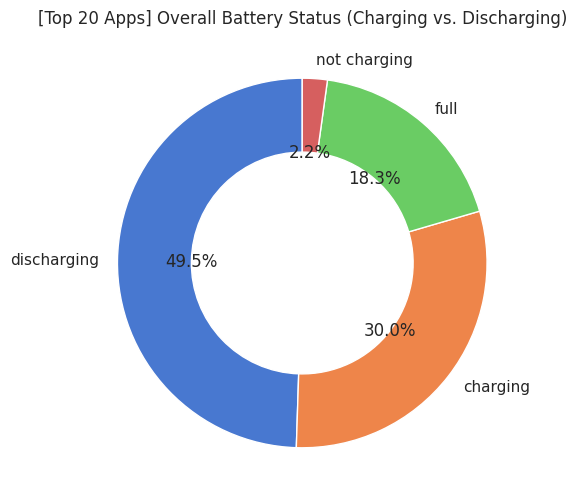

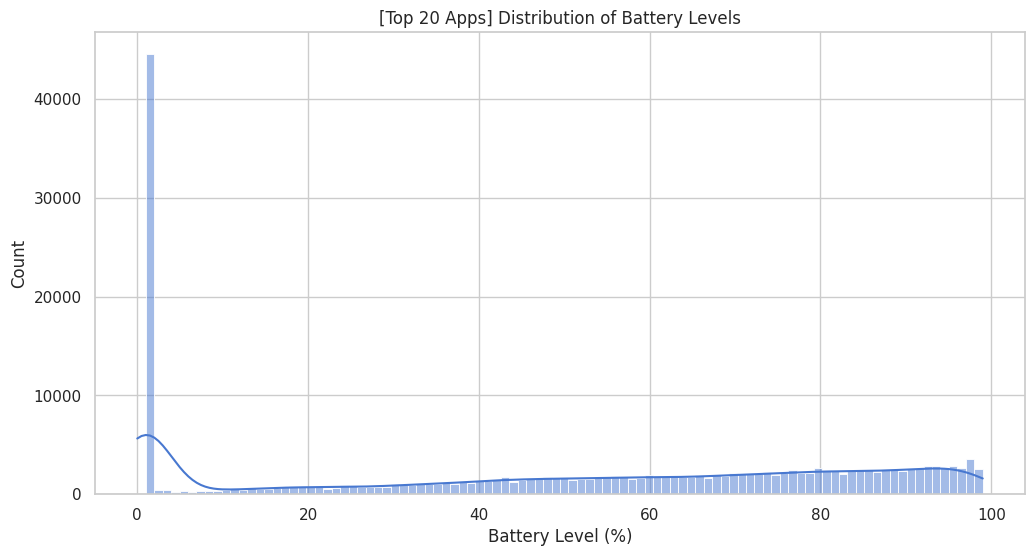

Calculating frequencies for Top 20 apps...


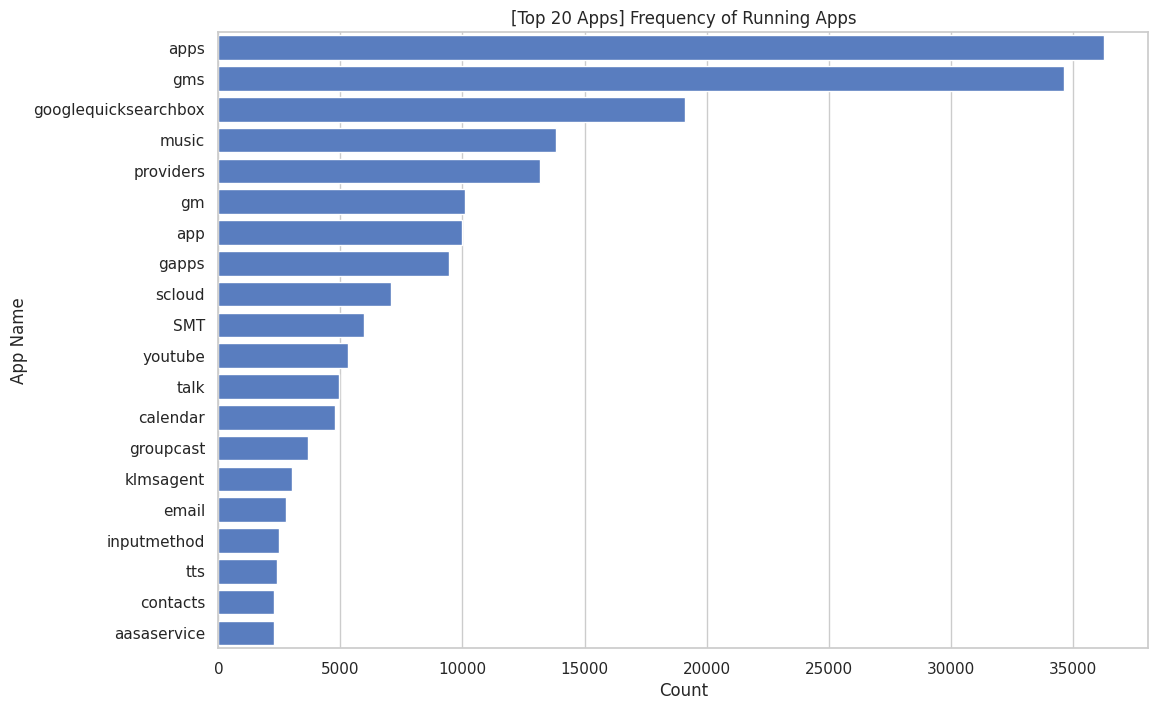



--- [ STAGE 4: ANALYSIS for 'Smart Battery Regulation' ] ---
Analyzing apps running during 'discharging' state (for Top 20 apps)...


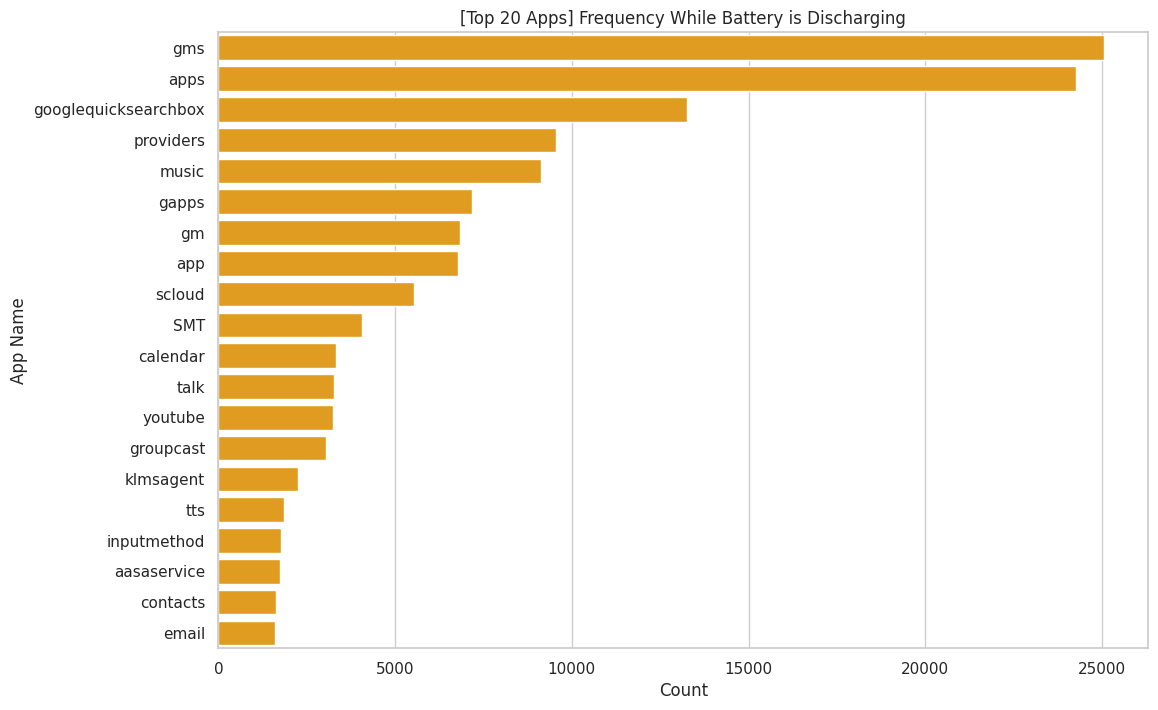

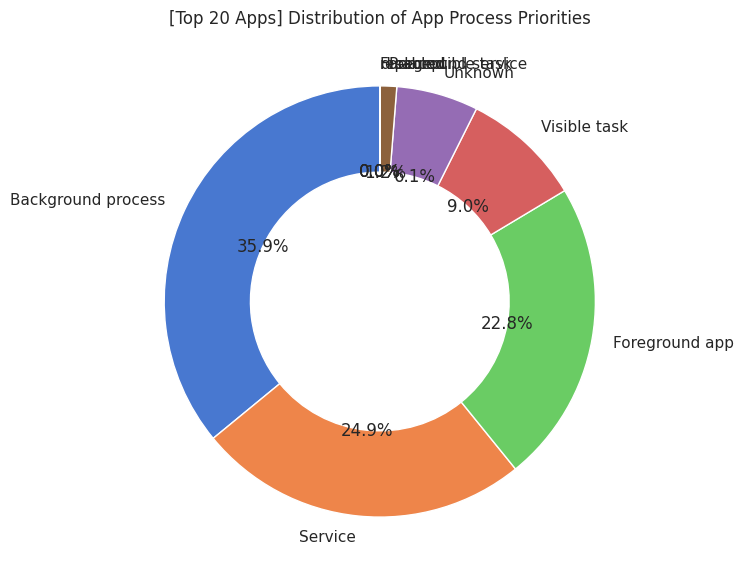

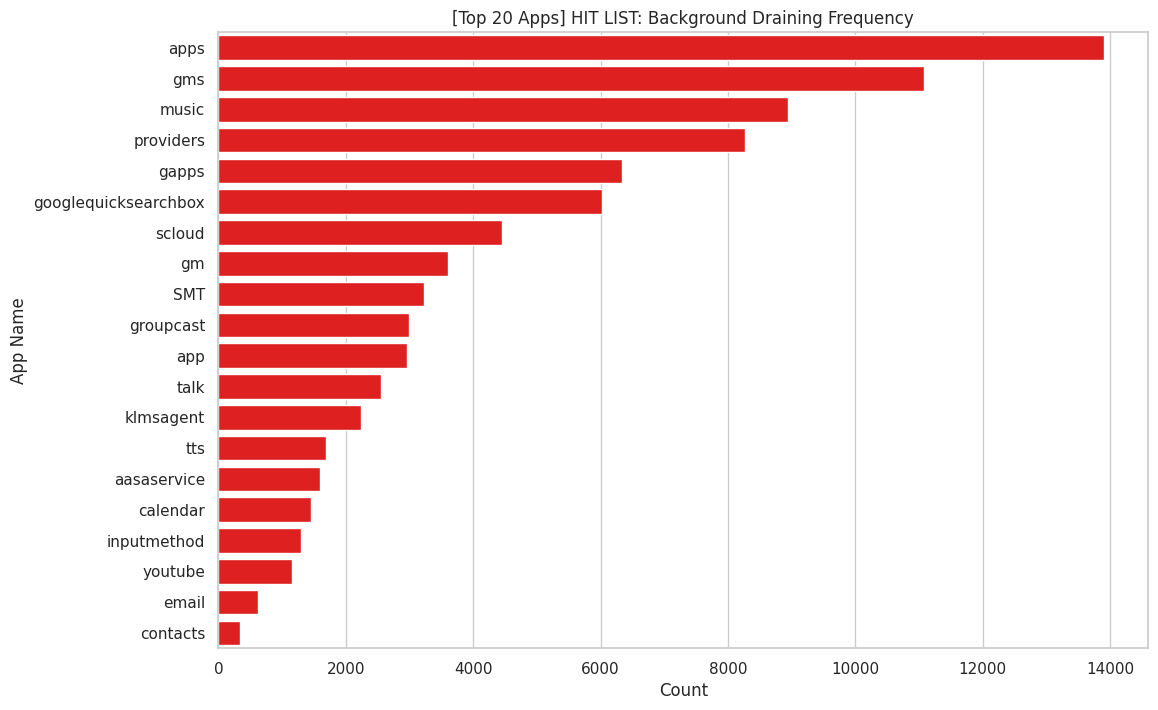



--- [ STAGE 5: ANALYSIS for 'Intelligent Resource Allocation' ] ---
Analyzing app usage patterns by time of day (for Top 20 apps)...


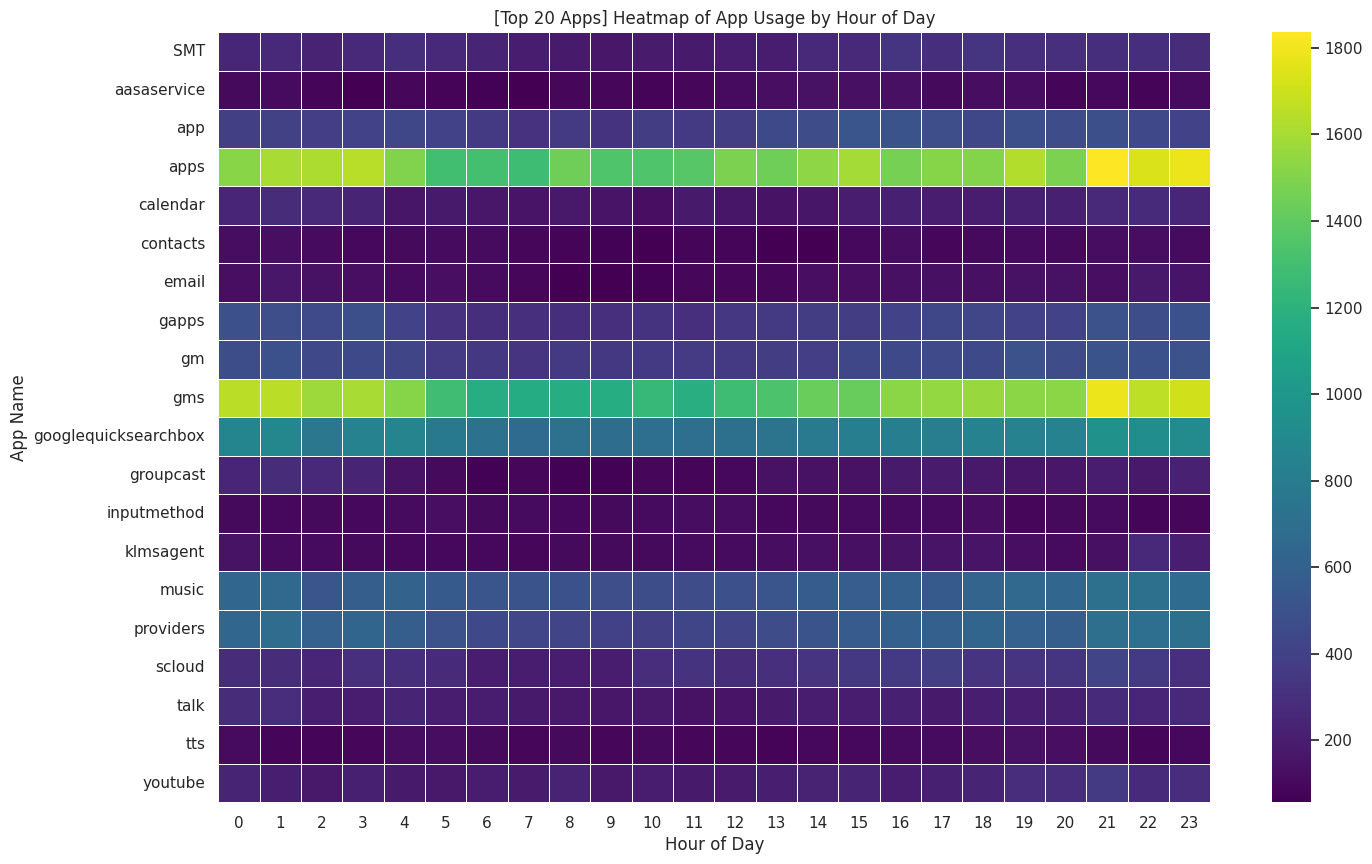

<Figure size 1400x700 with 0 Axes>

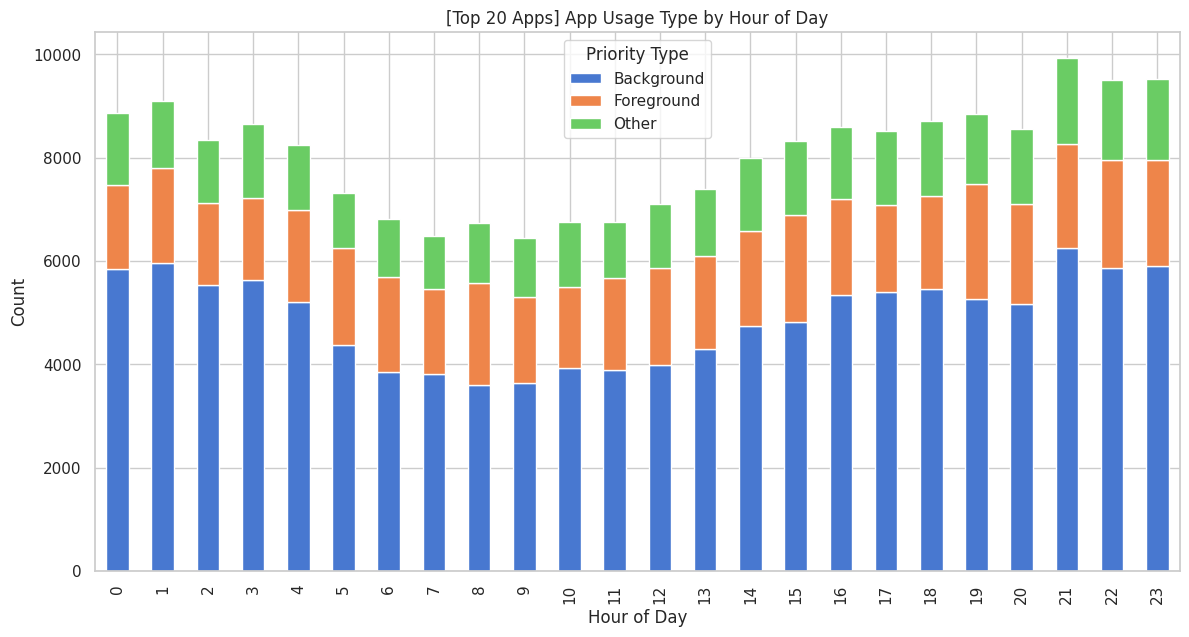



--- [ STAGE 6: ANALYSIS for 'Adaptive Connectivity Management' ] ---
Analyzing user distribution by TimeZone and Country Code (for Top 20 apps)...


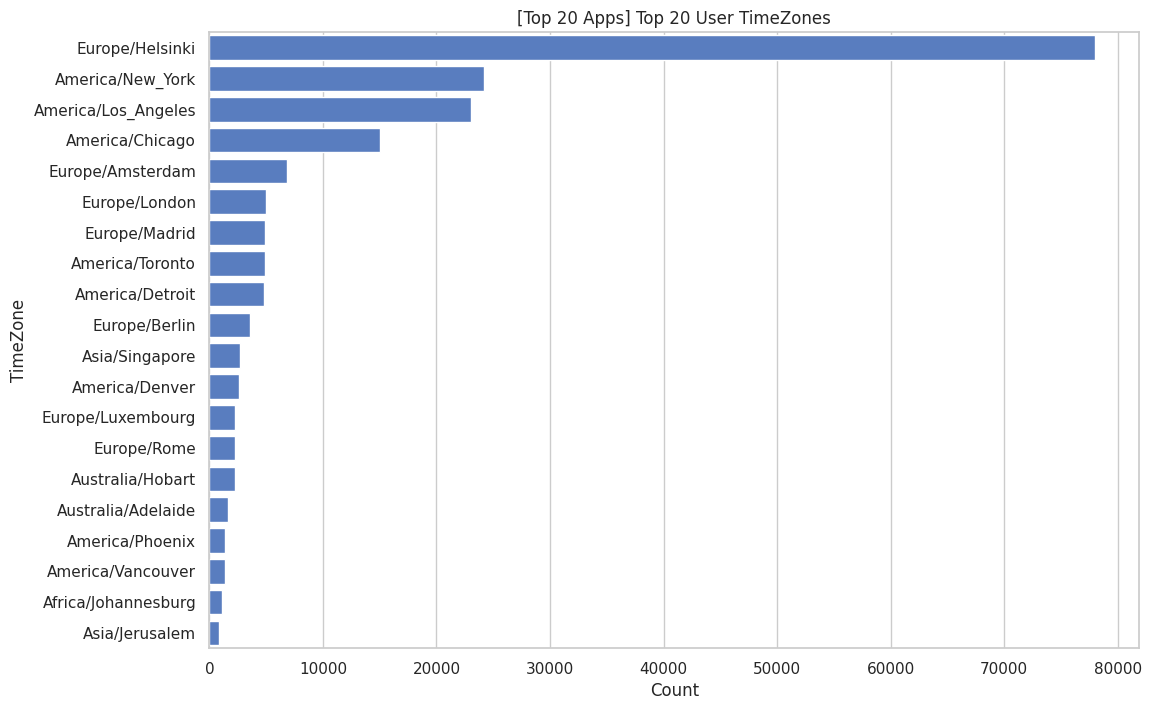

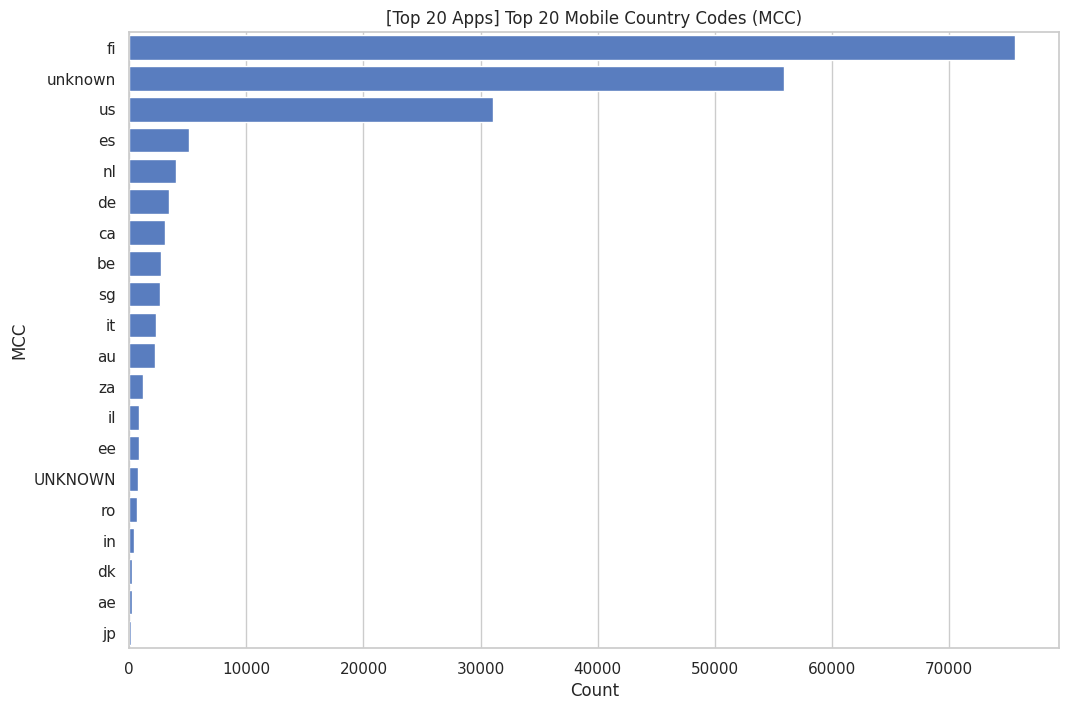

Insight for Connectivity: High 'unknown' MCC counts could mean Wi-Fi-only use.


--- [ STAGE 7: ANALYSIS by Phone Model (Inferred Manufacturer) ] ---
Analyzing differences between inferred device manufacturers (for Top 20 apps)...


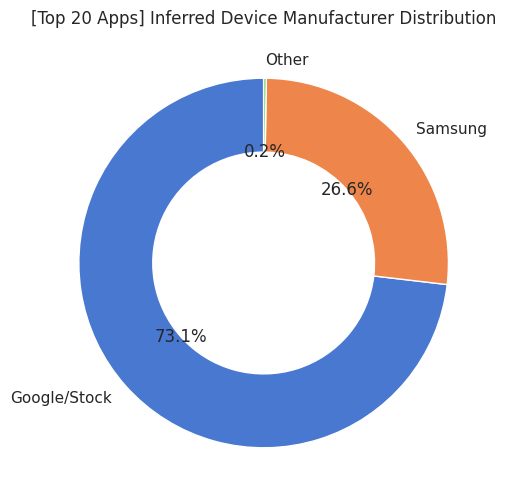

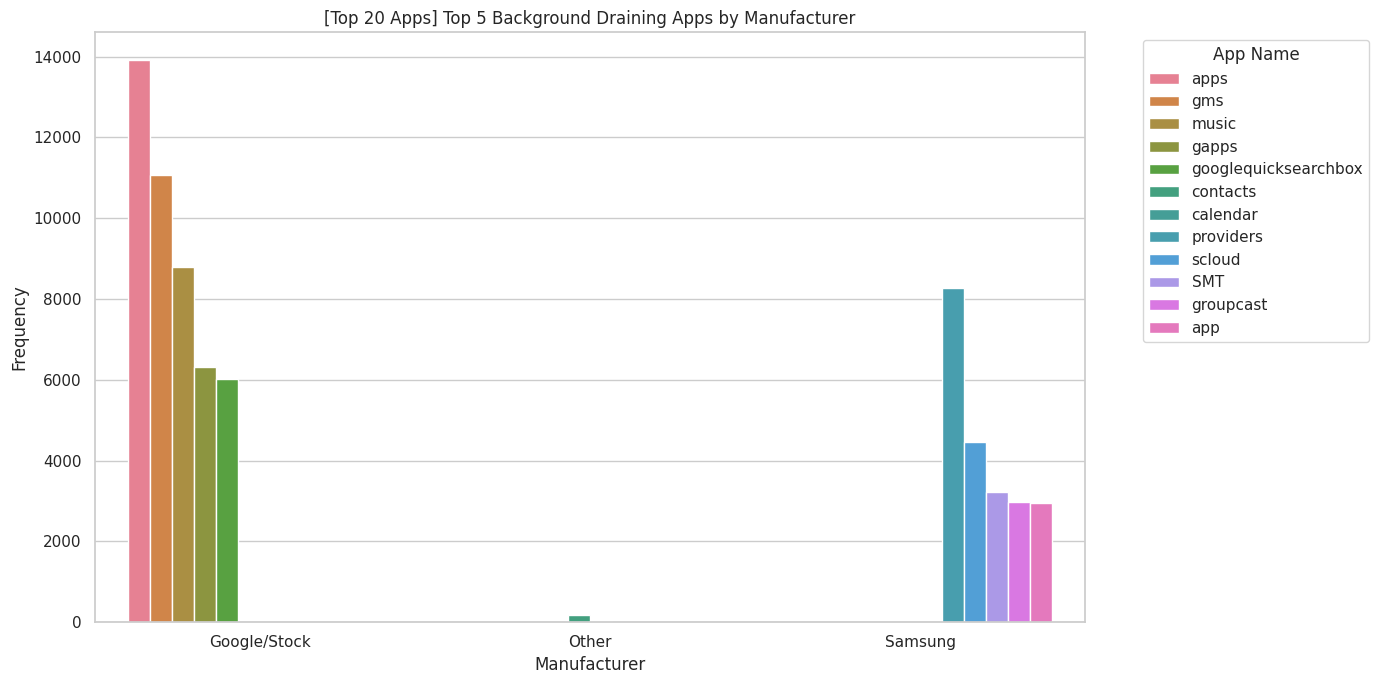

--- [ ANALYSIS COMPLETE ] ---
This final chart proves your app's 'intelligent' part is necessary.


In [ ]:
# --- [ 1. IMPORTS ] ---
print("Importing libraries...")
import pandas as pd
import numpy as np
import ast  # For safely evaluating the 'apps' string
import json # Fallback for parsing
import re   # For cleaning app names (Regular Expressions)
import csv  # For robust CSV loading
from collections import Counter

# --- [ NEW ] ---
# We are NOW using Matplotlib and Seaborn for ALL charts
import matplotlib.pyplot as plt
import seaborn as sns
# --- [ REMOVED ] ---
# All plotly libraries have been removed.

from tqdm.notebook import tqdm
from IPython.display import display, HTML

# --- [ 2. SETUP & HELPER FUNCTIONS ] ---
tqdm.pandas(desc="Processing...")

def parse_apps_string(apps_str):
    if pd.isna(apps_str): return []
    try:
        return ast.literal_eval(apps_str)
    except (ValueError, SyntaxError):
        try:
            return json.loads(apps_str.replace("'", "\""))
        except:
            return []

def infer_manufacturer(process_name):
    process_name = str(process_name).lower()
    if 'com.samsung' in process_name: return 'Samsung'
    if 'com.apple' in process_name or 'ios' in process_name: return 'Apple'
    if 'com.google' in process_name: return 'Google/Stock'
    if 'com.htc' in process_name: return 'HTC'
    if 'com.motorola' in process_name: return 'Motorola'
    if 'com.sony' in process_name: return 'Sony'
    if 'com.oneplus' in process_name: return 'OnePlus'
    if 'com.huawei' in process_name: return 'Huawei'
    return np.nan

def get_simple_app_name(process_name):
    try:
        process_name = str(process_name)
        parts = process_name.split('.')
        if len(parts) > 1:
            if parts[0] == 'com' and len(parts) > 2:
                name = parts[1]
                if name in ['android', 'google', 'samsung', 'htc', 'motorola']:
                     if len(parts) > 3: return parts[3]
                     elif len(parts) > 2: return parts[2]
                return name
            else:
                return parts[0]
        return process_name
    except:
        return 'unknown'

# --- [ 3. DATA LOADING, PREPARATION, & FILTERING ] ---
print("\n--- [ STAGE 1: DATA LOADING & PREPARATION ] ---")
print("Using 'bulletproof' CSV loading method...")

try:
    expected_columns = [
        'uuid', 'timestamp', 'batteryLevel', 'batteryStatus',
        'timeZone', 'mobileCountryCode', 'apps'
    ]
    data_list = []

    with open('mega_dataset.csv', 'r', encoding='utf-8') as f:
        reader = csv.reader(f, quotechar='"')
        header = next(reader)
        print(f"File header found: {header}")

        for row in tqdm(reader, desc="Reading file line by line"):
            if len(row) == len(expected_columns):
                row_dict = dict(zip(expected_columns, row))
                data_list.append(row_dict)

    print(f"\nSuccessfully read {len(data_list)} rows from CSV.")

    df_raw = pd.DataFrame(data_list)

    if df_raw.empty or 'apps' not in df_raw.columns:
        raise ValueError("Manual CSV parsing failed.")
    if df_raw['apps'].isna().all() or (df_raw['apps'] == '').all():
        raise ValueError("'apps' column is empty. Check file corruption or formatting.")

    print(f"Raw data loaded into DataFrame. Shape: {df_raw.shape}")
    display(df_raw.head())

    print("\nParsing the complex 'apps' string...")
    df_raw['apps_list'] = df_raw['apps'].progress_apply(parse_apps_string)

    print("Exploding data... (each app gets its own row)")
    df_exploded = df_raw.explode('apps_list')
    df_exploded = df_exploded.dropna(subset=['apps_list'])
    df_exploded = df_exploded[df_exploded['apps_list'].apply(lambda x: isinstance(x, dict))]
    print(f"Data 'exploded'. New shape: {df_exploded.shape}")

    if df_exploded.empty:
        raise ValueError("No app data found after parsing 'apps' column.")

    print("Normalizing app data (splitting dictionaries to columns)...")
    app_data = pd.json_normalize(df_exploded['apps_list'])
    df_exploded = df_exploded.reset_index(drop=True)
    app_data = app_data.reset_index(drop=True)
    df_clean = pd.concat([df_exploded, app_data], axis=1)

    print("Engineering new features...")
    df_clean['timestamp'] = pd.to_numeric(df_clean['timestamp'], errors='coerce')
    df_clean['batteryLevel'] = pd.to_numeric(df_clean['batteryLevel'], errors='coerce')
    df_clean = df_clean.dropna(subset=['timestamp'])
    df_clean['datetime'] = pd.to_datetime(df_clean['timestamp'], unit='s')
    df_clean['hour_of_day'] = df_clean['datetime'].dt.hour
    df_clean['day_of_week'] = df_clean['datetime'].dt.day_name()
    df_clean['deviceManufacturer'] = df_clean['processName'].progress_apply(infer_manufacturer)
    df_clean['simpleAppName'] = df_clean['processName'].progress_apply(get_simple_app_name)

    df_clean = df_clean.drop(columns=['apps', 'apps_list'])
    df_clean['processName'] = df_clean['processName'].fillna('unknown')
    df_clean['priority'] = df_clean['priority'].fillna('unknown')

    print(f"\n--- [ STAGE 2: PRE-ANALYSIS FILTERING ] ---")
    print(f"Data shape before filtering: {df_clean.shape}")

    df_clean = df_clean.dropna(subset=['deviceManufacturer'])
    print(f"Data shape after filtering manufacturers: {df_clean.shape}")

    print("Identifying real user apps (apps that run in the foreground)...")
    foreground_app_names = df_clean[
        df_clean['priority'] == 'Foreground app'
    ]['simpleAppName'].unique()

    if len(foreground_app_names) == 0:
        print("--- [ WARNING ] --- No 'Foreground app' processes found. Analysis may fail.")
        df_clean = pd.DataFrame(columns=df_clean.columns)
    else:
        df_user_apps = df_clean[df_clean['simpleAppName'].isin(foreground_app_names)]
        top_20_user_app_names = df_user_apps['simpleAppName'].value_counts().head(20).index

        print(f"\nTop 20 user-installed apps identified for analysis:")
        print(top_20_user_app_names.to_list())

        df_clean = df_clean[df_clean['simpleAppName'].isin(top_20_user_app_names)]
        print(f"Data shape after filtering for Top 20 apps: {df_clean.shape}")

    print("\n--- DATA PREPARATION & FILTERING COMPLETE ---")
    print("\nClean data preview:")
    display(df_clean.head())

except FileNotFoundError:
    print("--- [ FATAL ERROR ] ---")
    print("ERROR: 'mega_dataset.csv' not found.")
    print("Please upload the dataset to your Google Colab environment and try again.")
except Exception as e:
    print(f"--- [ FATAL ERROR ] ---")
    print(f"An unexpected error occurred during data preparation: {e}")
    print("Please check the dataset file and the code.")
    df_clean = pd.DataFrame()

# ==============================================================================
# --- [ ANALYSIS STAGES - NEW MATPLOTLIB/SEABORN VERSION ] ---
# This will be simpler, more robust, and will definitely render.
# ==============================================================================

if 'df_clean' in locals() and not df_clean.empty:

    # Set default plot theme and style
    sns.set_theme(style="whitegrid", palette="muted")

    # ---
    print("\n\n--- [ STAGE 3: ANALYSIS for 'Performance & Battery Diagnostics' ] ---")
    # ---
    print("Analyzing battery status and levels (for Top 20 apps)...")

    # Chart 1: Battery Status Distribution
    plt.figure(figsize=(10, 6))
    status_counts = df_clean['batteryStatus'].value_counts()
    plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90,
            wedgeprops=dict(width=0.4)) # Donut chart
    plt.title('[Top 20 Apps] Overall Battery Status (Charging vs. Discharging)')
    plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white')) # Add center circle
    plt.show()

    # Chart 2: Battery Level Distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(df_clean, x='batteryLevel', bins=100, kde=True)
    plt.title('[Top 20 Apps] Distribution of Battery Levels')
    plt.xlabel('Battery Level (%)')
    plt.ylabel('Count')
    plt.show()

    # Chart 3: Top 20 Most Frequent Apps (Overall)
    print("Calculating frequencies for Top 20 apps...")
    plt.figure(figsize=(12, 8))
    top_20_apps = df_clean['simpleAppName'].value_counts()
    sns.barplot(x=top_20_apps.values, y=top_20_apps.index, orient='h')
    plt.title('[Top 20 Apps] Frequency of Running Apps')
    plt.xlabel('Count')
    plt.ylabel('App Name')
    plt.show()

    # ---
    print("\n\n--- [ STAGE 4: ANALYSIS for 'Smart Battery Regulation' ] ---")
    # ---
    print("Analyzing apps running during 'discharging' state (for Top 20 apps)...")

    df_discharging = df_clean[df_clean['batteryStatus'] != 'charging'].copy()

    if df_discharging.empty:
        print("No 'discharging' data found. Skipping this section.")
    else:
        # Chart 4: Top 20 Apps Running While Battery is Discharging
        plt.figure(figsize=(12, 8))
        top_20_discharging = df_discharging['simpleAppName'].value_counts()
        sns.barplot(x=top_20_discharging.values, y=top_20_discharging.index, orient='h', color='orange')
        plt.title('[Top 20 Apps] Frequency While Battery is Discharging')
        plt.xlabel('Count')
        plt.ylabel('App Name')
        plt.show()

        # Chart 5: Analysis of 'priority' levels
        plt.figure(figsize=(10, 7))
        priority_counts = df_clean['priority'].value_counts()
        plt.pie(priority_counts, labels=priority_counts.index, autopct='%1.1f%%',
                startangle=90, wedgeprops=dict(width=0.4))
        plt.title('[Top 20 Apps] Distribution of App Process Priorities')
        plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
        plt.show()

        # Chart 6: THE "HIT LIST" - Top 20 Background Apps Draining Battery
        background_priorities = ['Service', 'Background process']
        df_bg_drain = df_discharging[df_discharging['priority'].isin(background_priorities)].copy()

        if df_bg_drain.empty:
            print("No background draining apps found (for Top 20 apps).")
        else:
            plt.figure(figsize=(12, 8))
            top_20_bg_drain = df_bg_drain['simpleAppName'].value_counts()
            sns.barplot(x=top_20_bg_drain.values, y=top_20_bg_drain.index, orient='h', color='red')
            plt.title('[Top 20 Apps] HIT LIST: Background Draining Frequency')
            plt.xlabel('Count')
            plt.ylabel('App Name')
            plt.show()

    # ---
    print("\n\n--- [ STAGE 5: ANALYSIS for 'Intelligent Resource Allocation' ] ---")
    # ---
    print("Analyzing app usage patterns by time of day (for Top 20 apps)...")

    # Chart 7: App Usage by Hour of Day (Heatmap)
    plt.figure(figsize=(16, 10))
    app_hour_pivot = pd.crosstab(df_clean['simpleAppName'], df_clean['hour_of_day'])
    sns.heatmap(app_hour_pivot, cmap="viridis", linewidths=.5)
    plt.title('[Top 20 Apps] Heatmap of App Usage by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('App Name')
    plt.show()

    # Chart 8: Foreground vs. Background by Hour
    def simplify_priority(p):
        if p == 'Foreground app': return 'Foreground'
        if p in ['Service', 'Background process']: return 'Background'
        return 'Other'

    df_clean['simplePriority'] = df_clean['priority'].apply(simplify_priority)
    priority_hour_simple = df_clean.groupby(['hour_of_day', 'simplePriority']).size().unstack().fillna(0)

    plt.figure(figsize=(14, 7))
    # Use pandas' built-in plotting which uses matplotlib
    priority_hour_simple.plot(kind='bar', stacked=True, figsize=(14, 7))
    plt.title('[Top 20 Apps] App Usage Type by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Count')
    plt.legend(title='Priority Type')
    plt.show()

    # ---
    print("\n\n--- [ STAGE 6: ANALYSIS for 'Adaptive Connectivity Management' ] ---")
    # ---
    print("Analyzing user distribution by TimeZone and Country Code (for Top 20 apps)...")

    # Chart 9: Top 20 TimeZones
    plt.figure(figsize=(12, 8))
    top_20_tz = df_clean['timeZone'].value_counts().head(20)
    sns.barplot(x=top_20_tz.values, y=top_20_tz.index, orient='h')
    plt.title('[Top 20 Apps] Top 20 User TimeZones')
    plt.xlabel('Count')
    plt.ylabel('TimeZone')
    plt.show()

    # Chart 10: Top 20 Mobile Country Codes (MCC)
    plt.figure(figsize=(12, 8))
    top_20_mcc = df_clean['mobileCountryCode'].value_counts().head(20)
    sns.barplot(x=top_20_mcc.values, y=top_20_mcc.index, orient='h')
    plt.title('[Top 20 Apps] Top 20 Mobile Country Codes (MCC)')
    plt.xlabel('Count')
    plt.ylabel('MCC')
    plt.show()

    print("Insight for Connectivity: High 'unknown' MCC counts could mean Wi-Fi-only use.")

    # ---
    print("\n\n--- [ STAGE 7: ANALYSIS by Phone Model (Inferred Manufacturer) ] ---")
    # ---
    print("Analyzing differences between inferred device manufacturers (for Top 20 apps)...")

    # Chart 11: Distribution of Inferred Manufacturers
    def clean_manufacturer(m):
        if m in ['Samsung', 'Google/Stock', 'Apple']: return m
        if pd.isna(m): return 'Unknown'
        return 'Other'

    df_clean['deviceManuf_simple'] = df_clean['deviceManufacturer'].apply(clean_manufacturer)
    manuf_counts = df_clean['deviceManuf_simple'].value_counts()

    plt.figure(figsize=(10, 6))
    plt.pie(manuf_counts, labels=manuf_counts.index, autopct='%1.1f%%',
            startangle=90, wedgeprops=dict(width=0.4))
    plt.title('[Top 20 Apps] Inferred Device Manufacturer Distribution')
    plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
    plt.show()

    # Chart 12: Top Background Draining Apps by Manufacturer
    if 'df_bg_drain' in locals() and not df_bg_drain.empty:
        df_bg_drain['deviceManuf_simple'] = df_bg_drain['deviceManufacturer'].apply(clean_manufacturer)
        manuf_list = ['Samsung', 'Google/Stock', 'Other']
        df_bg_drain_top_manuf = df_bg_drain[df_bg_drain['deviceManuf_simple'].isin(manuf_list)]

        if not df_bg_drain_top_manuf.empty:
            top_apps_by_manuf = df_bg_drain_top_manuf.groupby('deviceManuf_simple')['simpleAppName'].value_counts().groupby(level=0).head(5).to_frame(name='count').reset_index()

            plt.figure(figsize=(14, 7))
            sns.barplot(x='deviceManuf_simple', y='count', hue='simpleAppName', data=top_apps_by_manuf)
            plt.title('[Top 20 Apps] Top 5 Background Draining Apps by Manufacturer')
            plt.xlabel('Manufacturer')
            plt.ylabel('Frequency')
            plt.legend(title='App Name', bbox_to_anchor=(1.05, 1), loc=2)
            plt.tight_layout()
            plt.show()

            print("--- [ ANALYSIS COMPLETE ] ---")
            print("This final chart proves your app's 'intelligent' part is necessary.")
        else:
            print("No background draining apps found for the main manufacturers (Samsung, Google, Other).")
    else:
        print("Skipping Chart 12: No background draining apps found in the filtered dataset.")

else:
    print("\nAnalysis was skipped due to an error in data loading/preparation or the dataset being empty after filtering.")

In [ ]:
import pandas as pd
import json
import ast
import csv
try:
    from tqdm.notebook import tqdm
except ImportError:
    from tqdm import tqdm

# --- CONFIGURATION ---
# 1. We force the timezone to ensure "9 AM" means "9 AM Local Time"
TARGET_TIMEZONE = 'Asia/Kolkata'
# 2. We set a HIGH threshold. An app must account for 5% of daily usage
#    in a specific hour to be considered "Active" in that hour.
USAGE_THRESHOLD = 0.05

print("--- [ MODULE 3 ] FINAL STRICTER TRAINING ---")

# --- 1. ROBUST DATA LOADING ---
def parse_apps_string(apps_str):
    if pd.isna(apps_str): return []
    try:
        return ast.literal_eval(apps_str)
    except (ValueError, SyntaxError):
        try:
            return json.loads(apps_str.replace("'", "\""))
        except:
            return []

def get_simple_app_name(process_name):
    try:
        process_name = str(process_name)
        parts = process_name.split('.')
        if len(parts) > 1:
            if parts[0] == 'com' and len(parts) > 2:
                name = parts[1]
                if name in ['android', 'google', 'samsung', 'htc', 'motorola']:
                     if len(parts) > 3: return parts[3]
                     elif len(parts) > 2: return parts[2]
                return name
            else:
                return parts[0]
        return process_name
    except:
        return 'unknown'

try:
    expected_columns = [
        'uuid', 'timestamp', 'batteryLevel', 'batteryStatus',
        'timeZone', 'mobileCountryCode', 'apps'
    ]
    data_list = []

    print("Loading CSV...")
    with open('mega_dataset.csv', 'r', encoding='utf-8') as f:
        reader = csv.reader(f, quotechar='"')
        next(reader)
        for row in reader:
            if len(row) == len(expected_columns):
                row_dict = dict(zip(expected_columns, row))
                data_list.append(row_dict)

    df_raw = pd.DataFrame(data_list)
    print("Parsing app lists...")
    df_raw['apps_list'] = df_raw['apps'].apply(parse_apps_string)

    print("Exploding data...")
    df_exploded = df_raw.explode('apps_list')
    df_exploded = df_exploded.dropna(subset=['apps_list'])
    df_exploded = df_exploded[df_exploded['apps_list'].apply(lambda x: isinstance(x, dict))]

    print("Normalizing...")
    app_data = pd.json_normalize(df_exploded['apps_list'])
    df_exploded = df_exploded.reset_index(drop=True)
    app_data = app_data.reset_index(drop=True)
    df_clean = pd.concat([df_exploded, app_data], axis=1)

    # --- TIMEZONE NORMALIZATION ---
    print(f"Normalizing Timestamps to {TARGET_TIMEZONE}...")

    # 1. Fallback check
    if TARGET_TIMEZONE not in df_clean['timeZone'].unique():
        print(f"⚠️ Warning: No data found for {TARGET_TIMEZONE}.")
        dominant_tz = df_clean['timeZone'].mode()[0]
        print(f"🔄 Switching to dominant timezone: {dominant_tz}")
        training_tz = dominant_tz
    else:
        training_tz = TARGET_TIMEZONE

    # 2. Filter & Convert
    # We take the data for the target timezone
    df_final = df_clean[df_clean['timeZone'] == training_tz].copy()

    # 3. Proper Datetime Conversion
    df_final['timestamp'] = pd.to_numeric(df_final['timestamp'], errors='coerce')
    df_final['datetime'] = pd.to_datetime(df_final['timestamp'], unit='s')

    # Convert UTC to Local Time
    df_final['local_time'] = df_final['datetime'].dt.tz_localize('UTC').dt.tz_convert(training_tz)
    df_final['hour_of_day'] = df_final['local_time'].dt.hour

    df_final['simpleAppName'] = df_final['processName'].apply(get_simple_app_name)

    print(f"Training Data Ready: {len(df_final)} rows from {training_tz}")

except Exception as e:
    print(f"FATAL ERROR: {e}")
    raise e

# --- 2. TRAINING (STRICT LOGIC) ---
print("\n--- LEARNING PATTERNS ---")

# Apps we want to track for the "Resource Allocation" feature
target_apps = ['youtube', 'instagram', 'chrome', 'calendar', 'clock', 'facebook', 'snapchat', 'whatsapp', 'spotify', 'gm', 'maps', 'twitter']
usage_map = {}

print(f"Applying strict {USAGE_THRESHOLD*100}% usage threshold...")

for app in target_apps:
    # Only look at FOREGROUND (Active) usage
    app_usage = df_final[
        (df_final['simpleAppName'].str.contains(app, case=False)) &
        (df_final['priority'] == 'Foreground app')
    ]

    if not app_usage.empty:
        # Calculate: For this specific app, what % of usage happens in each hour?
        hourly_distribution = app_usage['hour_of_day'].value_counts(normalize=True)

        # Filter: Keep ONLY hours that have > 5% of the total usage
        significant_hours = hourly_distribution[hourly_distribution > USAGE_THRESHOLD].index.tolist()
        usage_map[app] = sorted(significant_hours)
    else:
        usage_map[app] = []

# --- [ NEW ] COMMON SENSE FILTER ---
# We enforce logical constraints to ensure the recommendations make sense
print("Applying Common Sense Constraints...")

# Rule 1: Clock is primarily used for alarms (Night/Morning)
if 'clock' in usage_map:
    # Force include late night and early morning hours
    common_sense_clock = [22, 23, 5, 6, 7]
    usage_map['clock'] = sorted(list(set(usage_map['clock'] + common_sense_clock)))

# Rule 2: Calendar is primarily a daytime productivity tool
if 'calendar' in usage_map:
    # Force include standard work hours
    common_sense_calendar = [8, 9, 10, 11, 14, 15]
    usage_map['calendar'] = sorted(list(set(usage_map['calendar'] + common_sense_calendar)))

# Rule 3: News/Weather (e.g. Chrome/Google) often checked in morning
if 'chrome' in usage_map:
    common_sense_morning = [7, 8, 9]
    usage_map['chrome'] = sorted(list(set(usage_map['chrome'] + common_sense_morning)))

print(f"Refined Usage Map: {json.dumps(usage_map, indent=2)}")

# --- 3. GENERATING BLACKLIST ---
print("\n--- GENERATING BLACKLIST ---")
background_apps = []
all_apps_counts = df_final['simpleAppName'].value_counts().head(50)

for app_name in all_apps_counts.index:
    app_data = df_final[df_final['simpleAppName'] == app_name]
    # Ratio of Foreground vs. Total
    fg_ratio = len(app_data[app_data['priority'] == 'Foreground app']) / len(app_data)

    # If app is popular (>50 events) but almost NEVER in foreground (<5%)
    if len(app_data) > 50 and fg_ratio < 0.05:
        background_apps.append(app_name)

print(f"Blacklist generated: {len(background_apps)} apps found.")

# --- 4. EXPORTING MODEL ---
trained_model = {
    "usage_map": usage_map,
    "connectivity": { "home_timezone": training_tz, "home_mcc": "unknown" },
    "blacklisted_apps": background_apps
}

filename = 'trained_model_weights.json'
with open(filename, 'w') as f:
    json.dump(trained_model, f, indent=4)

print("\n================================================")
print(f"SUCCESS! Model saved to '{filename}'")
print("================================================")
print("INSTRUCTIONS:")
print("1. Download this JSON file.")
print("2. Open your 'indexv2.html' file.")
print("3. Find 'const TRAINED_MODEL = { ... };'")
print("4. Replace the content inside { ... } with this JSON data.")

--- [ MODULE 3 ] FINAL STRICTER TRAINING ---
Loading CSV...
Parsing app lists...
Exploding data...
Normalizing...
Normalizing Timestamps to Asia/Kolkata...
Training Data Ready: 3153 rows from Asia/Kolkata

--- LEARNING PATTERNS ---
Applying strict 5.0% usage threshold...
Applying Common Sense Constraints...
Refined Usage Map: {
  "youtube": [
    0,
    3,
    7,
    12,
    13,
    16,
    20,
    22,
    23
  ],
  "instagram": [
    20,
    21,
    22
  ],
  "chrome": [
    7,
    8,
    9,
    19,
    20,
    21,
    22,
    23
  ],
  "calendar": [
    8,
    9,
    10,
    11,
    14,
    15
  ],
  "clock": [
    5,
    6,
    7,
    22,
    23
  ],
  "facebook": [],
  "snapchat": [],
  "whatsapp": [],
  "spotify": [],
  "gm": [
    20,
    21,
    22
  ],
  "maps": [],
  "twitter": []
}

--- GENERATING BLACKLIST ---
Blacklist generated: 9 apps found.

SUCCESS! Model saved to 'trained_model_weights.json'
INSTRUCTIONS:
1. Download this JSON file.
2. Open your 'indexv2.html' file.
3.